Importing libraries

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

Importing classes

In [2]:
#CMAB
from Strategies.RLinUCB                    import RLinUCB
from Strategies.RLinUCBGlobal              import RLinUCBGlobal
from Strategies.RCLinUCB                   import RCLinUCB
from Strategies.RLinUCBProduct             import RLinUCBProduct
from Strategies.RCLinUCBProduct             import RCLinUCBProduct
#Rewards
from codigo.Strategies.Rewards.OffFeature import OffFeature

Init Parameters

In [3]:
#834596
iterations = 35000
experimentos = 1

d = 10
alpha = 1
lamb = 1

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
import pickle

with open('../datos/users.pkl', 'rb') as fp:
    users = list(pickle.load(fp))

with open('../datos/articles.pkl', 'rb') as fp:
    articles = list(pickle.load(fp).values())
    print(articles)

[{'clicks': 1389, 'views': 20650, 'features': array([[2.11406e-01],
       [3.60000e-05],
       [2.77300e-03],
       [5.69886e-01],
       [2.15900e-01]]), 'id': 109513, 'probability': 0.06726392251815981}, {'clicks': 1073, 'views': 24024, 'features': array([[2.95442e-01],
       [1.40000e-05],
       [1.35191e-01],
       [2.92304e-01],
       [2.77050e-01]]), 'id': 109473, 'probability': 0.044663669663669664}, {'clicks': 740, 'views': 16581, 'features': array([[2.64355e-01],
       [1.20000e-05],
       [3.73930e-02],
       [4.20649e-01],
       [2.77591e-01]]), 'id': 109506, 'probability': 0.04462939509076654}, {'clicks': 1825, 'views': 31747, 'features': array([[3.81149e-01],
       [1.29000e-04],
       [6.00380e-02],
       [2.69129e-01],
       [2.89554e-01]]), 'id': 109511, 'probability': 0.05748574668472611}, {'clicks': 18, 'views': 305, 'features': array([[3.75829e-01],
       [2.50000e-05],
       [3.30410e-02],
       [3.49637e-01],
       [2.41468e-01]]), 'id': 109505, 

In [5]:
user_amount = len(users)
print(user_amount)

k = len(articles)
print(k)
clusters_amounts = [1,2,4,8,16,k]

reward_class1 = OffFeature(articles, users)
reward_class2 = OffFeature(articles, users)
reward_class3 = OffFeature(articles, users)
reward_class4 = OffFeature(articles, users)
reward_class5 = OffFeature(articles, users)

3135
49


In [6]:
# Run experiments
linucb_regrets              = np.zeros((experimentos,iterations))
linucb_p_regrets              = np.zeros((experimentos,iterations))
linucb_g_regrets              = np.zeros((experimentos,iterations))
linucb_cluster_regrets       = np.zeros((experimentos,iterations))
linucb_p_cluster_regrets       = np.zeros((experimentos,iterations))
# Run experiments
for i in    range(experimentos):
    alpha = 0.4 #+ 0.1*random.random() #* 0.5 + 0.1
    lamb = 0.4 #+ 0.1*random.random() #* 0.5 + 0.1

    print('exp: ' + str(i + 1) + '/' + str(experimentos))
    reward_class1.reset()
    reward_class2.reset()
    reward_class3.reset()
    reward_class4.reset()
    reward_class5.reset()

    #club      = CLUB(k, iterations, reward_class, d, user_amount, alpha)
    linucbk       = RCLinUCB(k, iterations, reward_class1, d, user_amount, alpha, clusters_amounts, lamb, 1000, 500 )
    linucb       =  RLinUCB(k, iterations, reward_class2, d, user_amount, alpha, lamb )
    linucbg       = RLinUCBGlobal(k, iterations, reward_class3, d, user_amount, alpha, lamb )
    linucbprod    = RLinUCBProduct(k, iterations, reward_class4, d, alpha, lamb )
    linucbpk      = RCLinUCBProduct(k, iterations, reward_class5, d, user_amount, alpha, clusters_amounts, lamb, 1000, 500 )


    linucb_cluster_regrets[i]          = linucbk.run()
    linucb_p_cluster_regrets[i]          = linucbpk.run()
    linucb_regrets[i]                  = linucb.run()
    linucb_p_regrets[i]                = linucbprod.run()
    linucb_g_regrets[i]                = linucbg.run()


exp: 1/1
0/35000
1000/35000
2000/35000
3000/35000
4000/35000
5000/35000
6000/35000
7000/35000
8000/35000
9000/35000
10000/35000
11000/35000
12000/35000
13000/35000
14000/35000
15000/35000
16000/35000
17000/35000
18000/35000
19000/35000
20000/35000
21000/35000
22000/35000
23000/35000
24000/35000
25000/35000
26000/35000
27000/35000
28000/35000
29000/35000
30000/35000
31000/35000
32000/35000
33000/35000
34000/35000
0/35000
1000/35000
2000/35000
3000/35000
4000/35000
5000/35000
6000/35000
7000/35000
8000/35000
9000/35000
10000/35000
11000/35000
12000/35000
13000/35000
14000/35000
15000/35000
16000/35000
17000/35000
18000/35000
19000/35000
20000/35000
21000/35000
22000/35000
23000/35000
24000/35000
25000/35000
26000/35000
27000/35000
28000/35000
29000/35000
30000/35000
31000/35000
32000/35000
33000/35000
34000/35000
0/35000
1000/35000
2000/35000
3000/35000
4000/35000
5000/35000
6000/35000
7000/35000
8000/35000
9000/35000
10000/35000
11000/35000
12000/35000
13000/35000
14000/35000
15000/3500

In [7]:
#linucb
linucb_inf            = np.percentile(linucb_regrets,inf_percentile ,axis=0)
linucb_median_rew     = np.median(linucb_regrets,axis=0)
linucb_sup            = np.percentile(linucb_regrets,sup_percentile ,axis=0)

linucb_p_inf            = np.percentile(linucb_p_regrets,inf_percentile ,axis=0)
linucb_p_median_rew     = np.median(linucb_p_regrets,axis=0)
linucb_p_sup            = np.percentile(linucb_p_regrets,sup_percentile ,axis=0)

linucb_g_inf            = np.percentile(linucb_g_regrets,inf_percentile ,axis=0)
linucb_g_median_rew     = np.median(linucb_g_regrets,axis=0)
linucb_g_sup            = np.percentile(linucb_g_regrets,sup_percentile ,axis=0)

linucb_c_inf            = np.percentile(linucb_cluster_regrets,inf_percentile ,axis=0)
linucb_c_median_rew     = np.median(linucb_cluster_regrets,axis=0)
linucb_c_sup            = np.percentile(linucb_cluster_regrets,sup_percentile ,axis=0)

linucb_p_clust_inf            = np.percentile(linucb_p_cluster_regrets,inf_percentile ,axis=0)
linucb_p_clust_median_rew     = np.median(linucb_p_cluster_regrets,axis=0)
linucb_p_clust_sup            = np.percentile(linucb_p_cluster_regrets,sup_percentile ,axis=0)

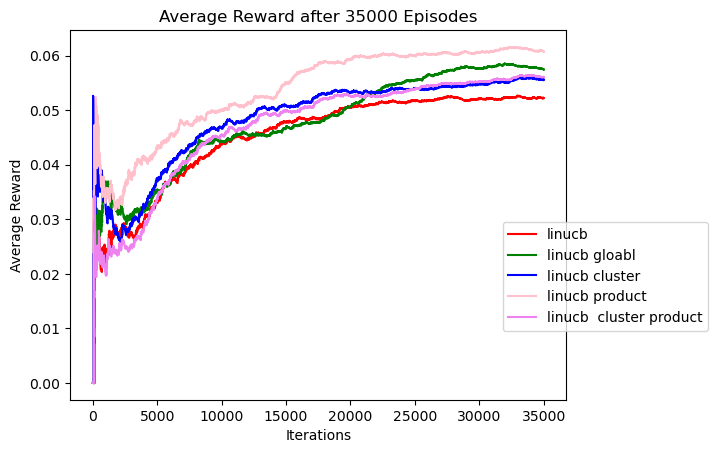

In [8]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb", color='red')
ax.fill_between(range(len(linucb_median_rew)),linucb_sup,linucb_inf, color = 'red', alpha = transparencia)

plt.plot(linucb_g_median_rew,label="linucb gloabl", color='green')
ax.fill_between(range(len(linucb_g_median_rew)),linucb_g_sup,linucb_g_inf, color = 'green', alpha = transparencia)

plt.plot(linucb_c_median_rew,label="linucb cluster", color='blue')
ax.fill_between(range(len(linucb_c_median_rew)),linucb_c_sup,linucb_c_inf, color = 'blue', alpha = transparencia)

plt.plot(linucb_p_median_rew,label="linucb product", color='pink')
ax.fill_between(range(len(linucb_p_median_rew)),linucb_p_sup,linucb_p_inf, color = 'pink', alpha = transparencia)

plt.plot(linucb_p_clust_median_rew,label="linucb  cluster product", color='violet')
ax.fill_between(range(len(linucb_p_clust_median_rew)),linucb_p_clust_sup,linucb_p_clust_inf, color = 'violet', alpha = transparencia)

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


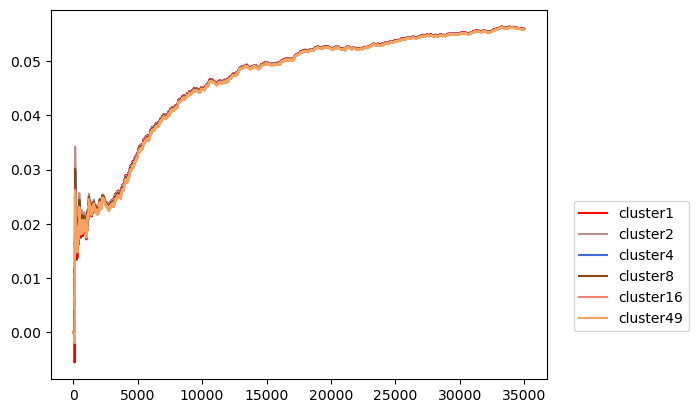

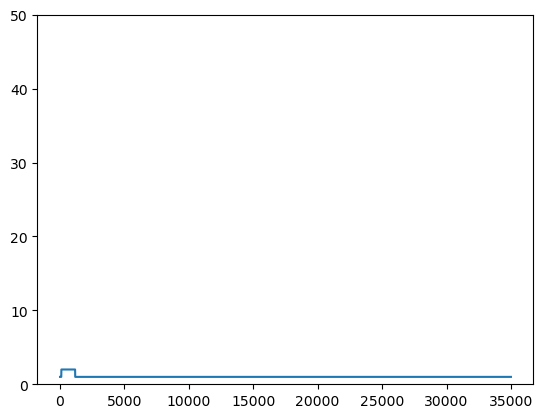

In [9]:
linucbpk.get_rc().graph()

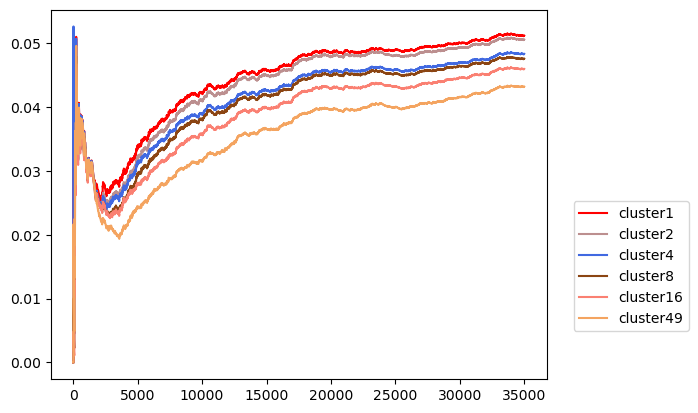

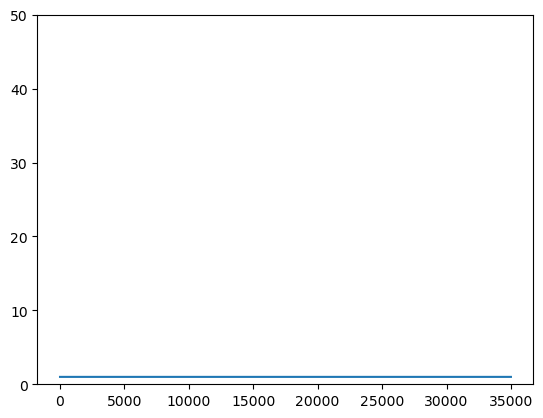

In [10]:
linucbk.get_rc().graph()

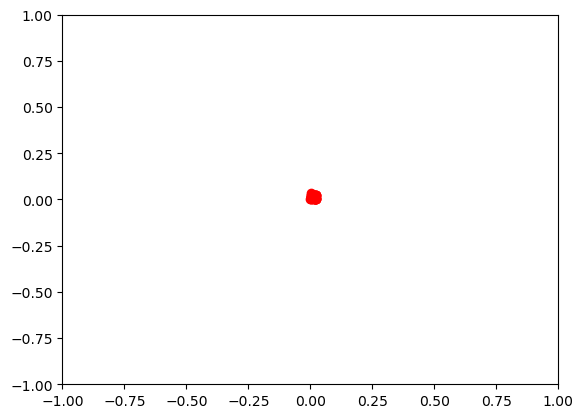

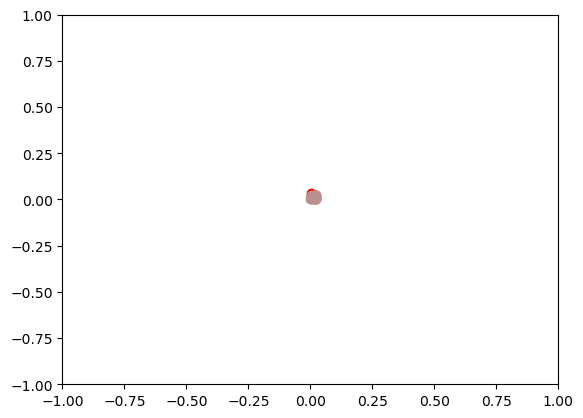

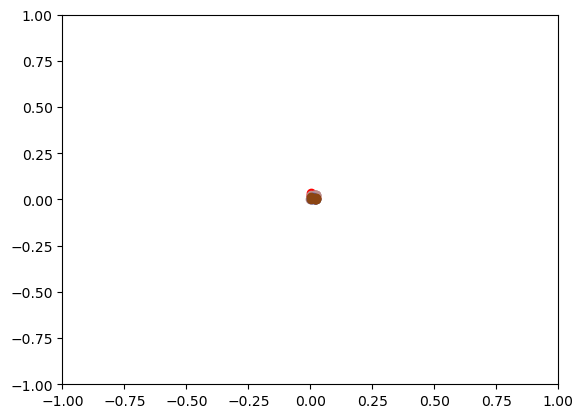

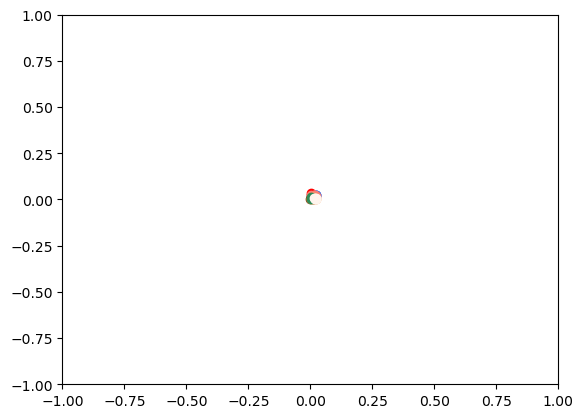

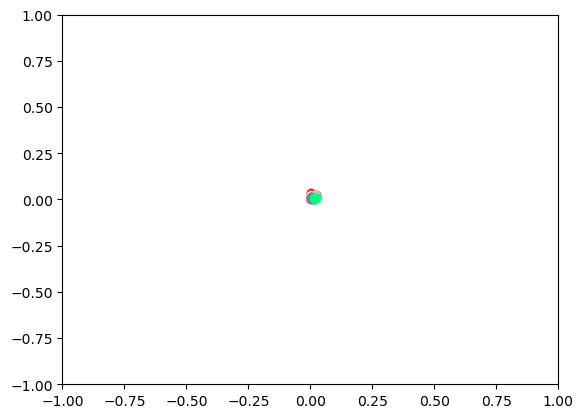

IndexError: list index out of range

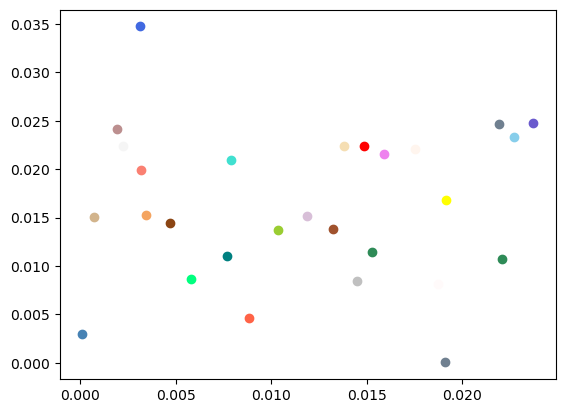

In [11]:
linucbpk.get_model().graph()